# Monte Carlo Methods

In [291]:
#https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
import scipy.stats as stats
import seaborn as sns

In [184]:
from __future__ import division
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

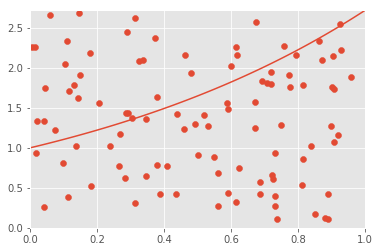

In [185]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0,1])
plt.ylim([0, np.e]);

In [123]:
#play

0.6257

(0, 0.6000)

(0, 1.9785)

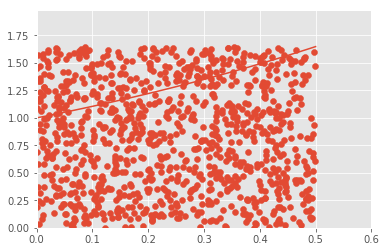

In [208]:
cut=0.5
n=1000
x=np.linspace(0, cut, 100 )
plt.plot(x,np.exp(x))

x = np.random.uniform(0, cut, n)

f = np.exp(x)
# f
r = np.random.uniform(0, np.exp(cut), n)
# r
stat = [ r[i] < f[i] for i in range(n)]
# stat
count = np.sum(stat)
# count
rol = 1.0 *count/n * (cut*np.exp(cut))
rol 

plt.scatter(x, r)
plt.xlim([0, cut*1.2])
plt.ylim([0, np.exp(cut)*1.2])

6.4285

(0, 2.4000)

(0, 8.8669)

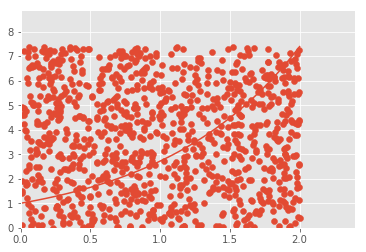

In [212]:
cut=2
n=1000
x=np.linspace(0, cut, 100 )
plt.plot(x,np.exp(x))

x = np.random.uniform(0, cut, n)

f = np.exp(x)
# f
r = np.random.uniform(0, np.exp(cut), n)
# r
stat = [ r[i] < f[i] for i in range(n)]
# stat
count = np.sum(stat)
# count
rol = 1.0 *count/n * (cut*np.exp(cut))
rol 

plt.scatter(x, r)
plt.xlim([0, cut*1.2])
plt.ylim([0, np.exp(cut)*1.2])

In [ ]:
rol

array([[0.4605, 0.104 ],
       [0.1006, 0.4811],
       [0.3297, 0.157 ],
       [0.4846, 0.1617],
       [0.3889, 0.3396],
       [0.2105, 0.1681],
       [0.0839, 0.3383],
       [0.3486, 0.4535],
       [0.3014, 0.485 ],
       [0.0081, 0.1093]])

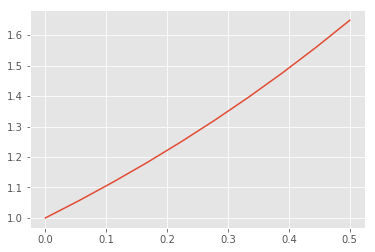

In [141]:
cut=0.5
n=10
x = np.linspace(0, cut, n)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,cut,(n, 2))
pts
# pts[:, 1] = np.exp(x)
# pts
# plt.scatter(pts[:, 0], pts[:, 1])
# plt.xlim([0,cut])
# plt.ylim([0, np.exp(cut)]);

In [142]:
np.exp(pts[:, 1])

array([1.1096, 1.6179, 1.17  , 1.1755, 1.4044, 1.1831, 1.4026, 1.5739,
       1.6242, 1.1155])

In [143]:
np.exp(0.1093)

1.1155

In [134]:
pts

array([[0.1361, 1.    ],
       [0.0477, 1.0571],
       [0.0684, 1.1175],
       [0.093 , 1.1814],
       [0.4245, 1.2488],
       [0.0025, 1.3202],
       [0.2245, 1.3956],
       [0.4962, 1.4753],
       [0.3755, 1.5596],
       [0.3272, 1.6487]])

In [55]:
# Check analytic solution

from sympy import symbols, integrate, exp

x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()

1.71828182845905

In [17]:
# Using numerical quadrature
# You may recall elementary versions such as the
# trapezoidal and Simpson's rules
# Note that nuerical quadrature needs $n^p$ grid points
# in $p$ dimensions to maintain the same accuracy
# This is known as the curse of dimensionality and explains
# why quadrature is not used for high-dimensional integration

from scipy import integrate
integrate.quad(exp, 0, 1)

(1.7183, 0.0000)

In [18]:
# Monte Carlo approximation

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n
    print '%10d %.6f' % (n, sol)

        10 1.902797
       100 1.766883
      1000 1.726109
     10000 1.686694
    100000 1.715888
   1000000 1.717737
  10000000 1.718011
 100000000 1.717993


In [ ]:
#play

In [29]:
n=5

pts = np.random.uniform(0, 1, (n, 2))
pts
pts[:, 1] *= np.e
count = np.sum(pts[:,1] < np.exp([pts[:,0]]))
count
volume = np.e * 1
volume
rol = (volume*count)/n
print '%10d %.6f' % (n, rol)

array([[0.4555, 0.1194],
       [0.3446, 0.3939],
       [0.0948, 0.7794],
       [0.8941, 0.6731],
       [0.4106, 0.8323]])

3

2.7183

         5 1.630969


In [82]:
x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()
expr = integrate(exp(x), (x,0,0.5))
expr.evalf()
expr = integrate(exp(x), (x,0,2))
expr.evalf()

1.71828182845905

0.648721270700128

6.38905609893065

In [120]:
np.exp(1)-np.exp(0)
np.exp(0.5)-np.exp(0)
np.exp(2)-np.exp(0)

1.7183

0.6487

6.3891

## exmple 2

In [231]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

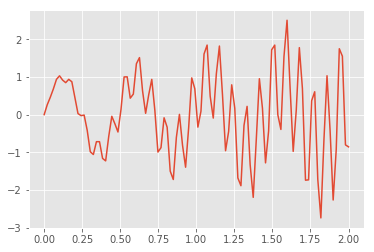

In [232]:
x = np.linspace(0,2,100)
plt.plot(x, f(x));

In [233]:
#Exact solution
from sympy import sin, cos, symbols, integrate

x = symbols('x')
integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(6)

0.0202549

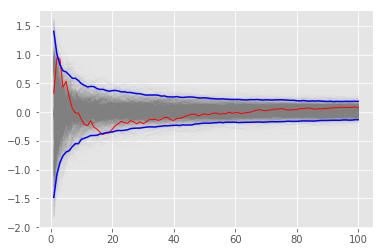

In [229]:
n = 100
reps = 1000
#Using multiple independent sequences
x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

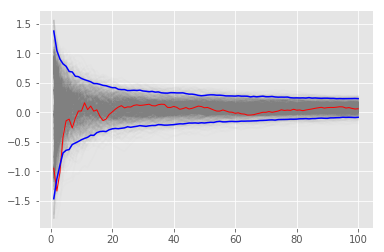

In [230]:
#Using bootstrap
xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

In [242]:
#play

In [272]:
n = 10
reps = 3
x = f(np.random.random((n, reps)))
x
np.cumsum(x, axis=0)
np.arange(1, n+1)[:, None]
np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)


array([[ 1.032 ,  0.2042, -1.7855],
       [-0.6362, -0.282 ,  0.9518],
       [ 0.0093, -0.7892,  0.8709],
       [-1.0903,  0.9999, -0.3489],
       [ 0.9227, -0.6608,  0.3522],
       [-0.5654, -1.265 ,  0.4186],
       [-0.2604, -0.9785,  0.5221],
       [ 0.4105,  0.0629, -0.6484],
       [ 1.0975,  0.0274, -0.6638],
       [ 0.0724, -0.7119,  0.9015]])

array([[ 1.032 ,  0.2042, -1.7855],
       [ 0.3958, -0.0778, -0.8337],
       [ 0.4051, -0.8669,  0.0371],
       [-0.6852,  0.133 , -0.3118],
       [ 0.2375, -0.5279,  0.0404],
       [-0.3279, -1.7929,  0.459 ],
       [-0.5884, -2.7714,  0.9811],
       [-0.1779, -2.7085,  0.3327],
       [ 0.9196, -2.6811, -0.3311],
       [ 0.992 , -3.393 ,  0.5704]])

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

array([[  1.032 ,   0.2042,  -1.7855],
       [  0.7916,  -0.1555,  -1.6675],
       [  1.2154,  -2.6008,   0.1113],
       [ -2.7407,   0.5319,  -1.2472],
       [  1.1877,  -2.6393,   0.2019],
       [ -1.9674, -10.7572,   2.7541],
       [ -4.1185, -19.3996,   6.8678],
       [ -1.423 , -21.6679,   2.6619],
       [  8.2762, -24.1295,  -2.9796],
       [  9.9197, -33.9296,   5.704 ]])

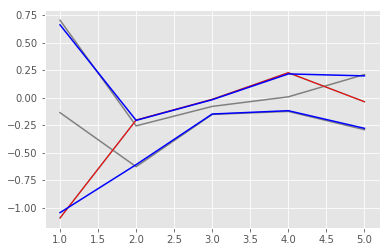

In [271]:
plt.plot(np.arange(1, n+1), y, c='grey')
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

## Variance reduction techniques

### Importance Sampling

In [273]:
h_true = 1 - stats.cauchy().cdf(3)
h_true

0.1024

In [274]:
n = 100

x = stats.cauchy().rvs(n)
h_mc = 1.0/n * np.sum(x > 3)
h_mc, np.abs(h_mc - h_true)/h_true

(0.1400, 0.3670)

In [275]:
y = stats.uniform().rvs(n)
h_cv = 1.0/n * np.sum(3.0/(np.pi * (9 + y**2)))
h_cv, np.abs(h_cv - h_true)/h_true

(0.1022, 0.0020)

In [277]:
#converge slow due to low percentage of data will fall into the range

In [278]:
#play

n = 1000

x = stats.cauchy().rvs(n)
h_mc = 1.0/n * np.sum(x > 3)
h_mc, np.abs(h_mc - h_true)/h_true

(0.1010, 0.0138)

In [283]:
def f2(x):
    return 1.0/np.pi*(1+x*x)

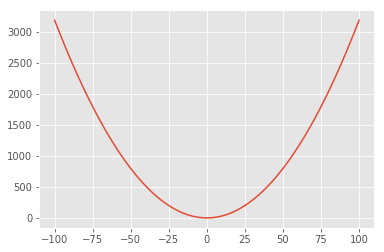

In [285]:
x=np.linspace(-100,100,10000)
plt.plot(x, f2(x))

In [288]:
%precision 10

h_true =1 - stats.norm().cdf(5)
h_true

u'%.10f'

0.0000002867

In [289]:
#Using direct Monte Carlo integration

n = 10000
y = stats.norm().rvs(n)
h_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0000000000, 1.0000000000)

In [290]:
#Using importance sampling

n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(0.0000002914, 0.0165672649)